In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../../Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../../Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(study_results, mouse_metadata, on='Mouse ID')

#sort data by Timepoint and reset indices
mouse_results = mouse_results.sort_values(by = 'Timepoint')
mouse_results.reset_index(drop=True, inplace=True)

# Display the data table for preview
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [2]:
# Checking the number of mice.
count = mouse_results["Mouse ID"].nunique()
count

249

In [3]:
mouse_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
unique = []
dup = []
for i in range(0, 250):
    if mouse_results['Mouse ID'][i] not in unique:
        unique.append(mouse_results['Mouse ID'][i])
    else:
        dup.append(mouse_results['Mouse ID'][i])

dup_df = pd.DataFrame()
dup_df['Mouse ID']=dup

dup_df['Mouse ID'].unique()
#print(f'array({dup}, dtype= {}

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = mouse_results[mouse_results['Mouse ID']=='g989']
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,g989,0,45.000000,0,Propriva,Female,21,26
232,g989,0,45.000000,0,Propriva,Female,21,26
277,g989,5,47.570392,0,Propriva,Female,21,26
335,g989,5,48.786801,0,Propriva,Female,21,26
599,g989,10,49.880528,0,Propriva,Female,21,26
600,g989,10,51.745156,0,Propriva,Female,21,26
736,g989,15,51.325852,1,Propriva,Female,21,26
742,g989,15,53.442020,0,Propriva,Female,21,26
1080,g989,20,54.657650,1,Propriva,Female,21,26
1102,g989,20,55.326122,1,Propriva,Female,21,26


In [6]:
mouse_results = mouse_results.loc[(
    mouse_results["Mouse ID"] != 'g989')]
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [7]:
mouse_results["Mouse ID"].nunique()

248

In [8]:
tumor_volume = mouse_results['Tumor Volume (mm3)'].value_counts()
tumor_volume.head()

45.000000    248
41.680791      1
47.622816      1
43.013681      1
63.440686      1
Name: Tumor Volume (mm3), dtype: int64

In [9]:
tumor_group = mouse_results.groupby(['Drug Regimen'])
tumor_group.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped = mouse_results.groupby(['Drug Regimen'])
# mean of the tumor volume.
mean = grouped['Tumor Volume (mm3)'].mean()
# median of the tumor volume.
median = grouped['Tumor Volume (mm3)'].median()
# variance of the tumor volume.
var = grouped['Tumor Volume (mm3)'].var()
# standard deviation of the tumor volume.
std = grouped['Tumor Volume (mm3)'].std()
# SEM of the tumor volume. 
sem = grouped['Tumor Volume (mm3)'].apply(lambda x: st.sem(x))

# Combine summary statistics into a single dataframe
tumor_summary = pd.concat([mean, median, var, std, sem], axis=1, keys=['Mean', 'Median', 'Variance', 'Std', 'SEM'])

# Print the summary statistics
tumor_summary

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_summary_agg = mouse_results.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])
tumor_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


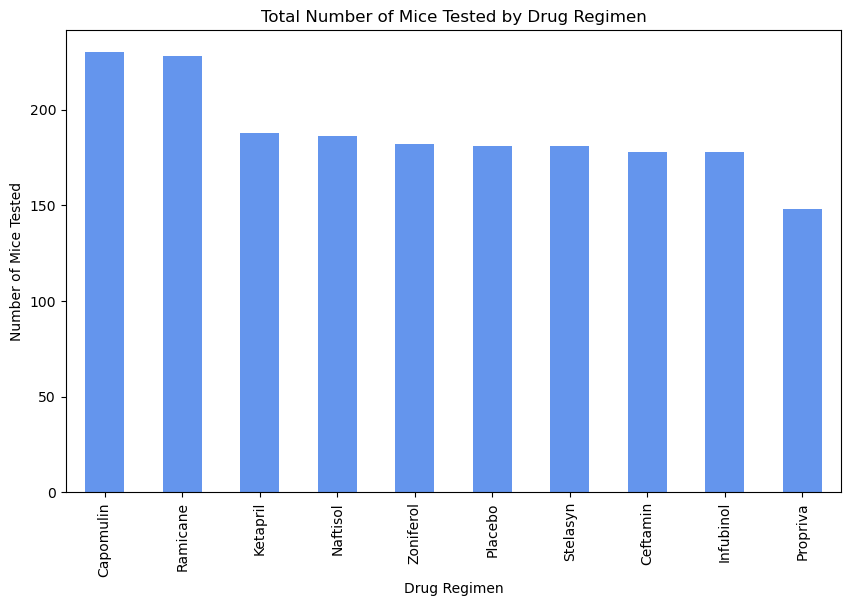

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints = mouse_results.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

# create a bar plot
plt.figure(figsize=(10,6))
ax = timepoints.plot(kind='bar', color='cornflowerblue')

# set the plot title and axes labels
ax.set_title('Total Number of Mice Tested by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Mice Tested')

# set the x-tick labels to the drug regimen names in the sorted order
ax.set_xticklabels(timepoints.index.tolist())

# show the plot
plt.show()

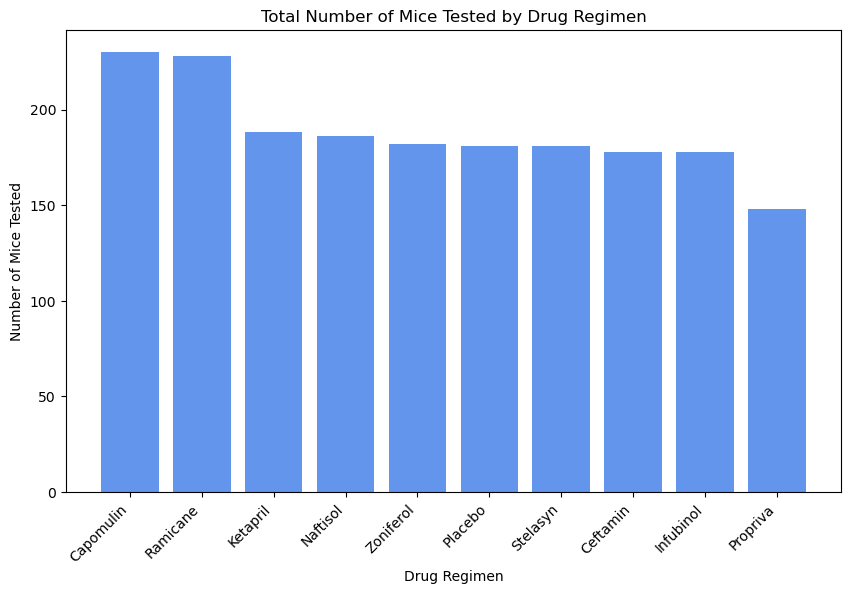

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints = mouse_results.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(x=timepoints.index, height=timepoints, color='cornflowerblue')

# Set the plot title and axes labels
plt.title('Total Number of Mice Tested by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

# Set the x-tick labels to the drug regimen names in the sorted order
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

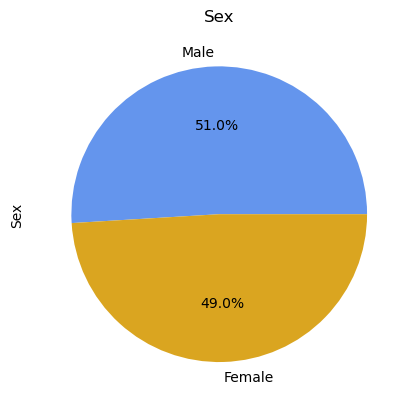

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_sex = mouse_results['Sex'].value_counts()

#create pie chart
count_sex.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['cornflowerblue', 'goldenrod'])

# set the plot title
plt.title('Sex')

# show the plot
plt.show()

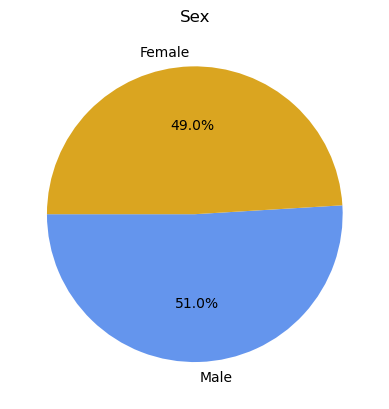

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_sex = mouse_results['Sex'].value_counts()

# Create a pie chart 
plt.pie(count_sex, labels=count_sex.index, autopct='%1.1f%%', startangle=180, colors=['cornflowerblue', 'goldenrod'])

# Set the plot title
plt.title('Sex')

# Show the plot
plt.show()

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
uniqueID = mouse_results['Mouse ID'].unique()

dicts = []
# Start by getting the last (greatest) timepoint for each mouse
for i in uniqueID:
    selected_rows = mouse_results.loc[mouse_results['Mouse ID'] == i]
    
    # Find the maximum value in the selected column
    max_value = selected_rows['Timepoint'].max()
    value = {"Mouse ID": i, "Timepoint": max_value}
    dicts.append(value)

max_time = pd.DataFrame(dicts)
max_time
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor = pd.merge(max_time, mouse_results, on=['Mouse ID', 'Timepoint'])
last_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,w584,30,58.268442,1,Infubinol,Male,3,29
2,p136,45,63.488697,2,Zoniferol,Female,5,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,b447,0,45.000000,0,Ceftamin,Male,2,30
...,...,...,...,...,...,...,...,...
243,c895,30,60.969711,2,Infubinol,Female,7,29
244,o562,45,72.455421,2,Propriva,Female,4,25
245,t451,45,68.711630,1,Stelasyn,Male,8,29
246,n304,45,63.586395,4,Naftisol,Male,9,26


In [17]:
# this step is technically unnecessary since we will be looking at each drug specifically, but I wanted to test myself 
# drop all rows that do not have the 4 main drug regimens
to_drop = ['Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol']
for drug in to_drop:
    last_tumor.drop(index=last_tumor.loc[last_tumor['Drug Regimen'] == drug].index, inplace=True)
last_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,w584,30,58.268442,1,Infubinol,Male,3,29
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,b447,0,45.000000,0,Ceftamin,Male,2,30
5,k210,45,68.923185,3,Ceftamin,Male,15,28
...,...,...,...,...,...,...,...,...
237,a644,45,32.978522,1,Ramicane,Female,7,17
238,q597,45,45.220869,2,Ramicane,Male,20,25
239,i177,45,33.562402,3,Ramicane,Male,10,18
242,j246,35,38.753265,1,Capomulin,Female,21,21


In [18]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
tumor_dict = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    this_drug = last_tumor.loc[last_tumor['Drug Regimen'] == drug]
    volumes = this_drug['Tumor Volume (mm3)'].tolist()
    
    # add subset
    quartiles = this_drug['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = this_drug.loc[(this_drug['Tumor Volume (mm3)'] < lower_bound) | (this_drug['Tumor Volume (mm3)'] > upper_bound)]
    drug_outliers = outliers['Tumor Volume (mm3)'].tolist()
    tumors = {drug: volumes, "lowerq": lowerq, 'upperq': upperq, 'iqr': iqr, 'outliers': drug_outliers}
    tumor_dict.append(tumors)
    tumor_vol.append(volumes)
    
tumor_vol    

[[38.98287774,
  36.04104736,
  40.65812366,
  38.1251644,
  31.02392294,
  40.72857787,
  41.48300765,
  28.48403281,
  38.93963263,
  23.34359787,
  37.31184577,
  28.43096411,
  30.48598484,
  33.32909778,
  47.68596303,
  34.45529799,
  41.58152074,
  31.8962384,
  32.37735684,
  40.1592203,
  37.07402422,
  38.84687569,
  39.95234669,
  46.53920617,
  38.75326548],
 [38.4076183,
  43.0475426,
  36.56165229,
  31.56046955,
  44.18345092,
  22.05012627,
  33.39765251,
  37.31123552,
  36.13485243,
  38.34200823,
  30.63869575,
  40.66771292,
  29.12847181,
  38.81036633,
  30.56462509,
  43.41938077,
  40.65900627,
  30.27623175,
  43.16637266,
  31.09533505,
  36.37451039,
  37.22565033,
  32.97852192,
  45.22086888,
  33.56240217],
 [58.26844248,
  72.2267309,
  36.3213458,
  62.43540402,
  57.03186187,
  47.01036401,
  66.19691151,
  60.16518046,
  46.25011212,
  55.65068132,
  51.54243058,
  67.68556862,
  50.00513807,
  45.69933088,
  66.08306589,
  54.65654872,
  62.75445141,


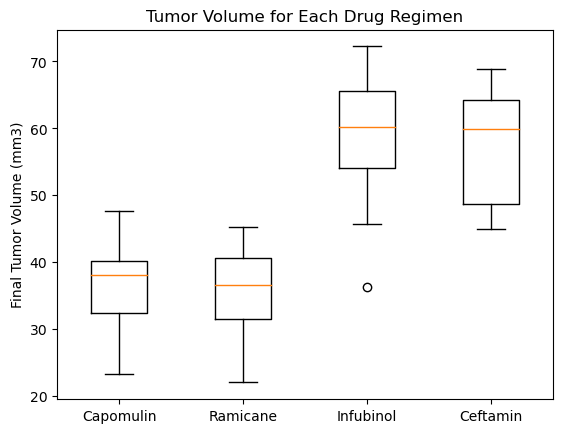

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol)
plt.xticks(range(1, len(treatments)+1), treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume for Each Drug Regimen')
plt.show()

In [20]:

# find which mice had the most timepoints
capomulin = mouse_results.loc[mouse_results['Drug Regimen'] == 'Capomulin']
cap_count = capomulin['Mouse ID'].value_counts()
top_mouse = cap_count.index[0]

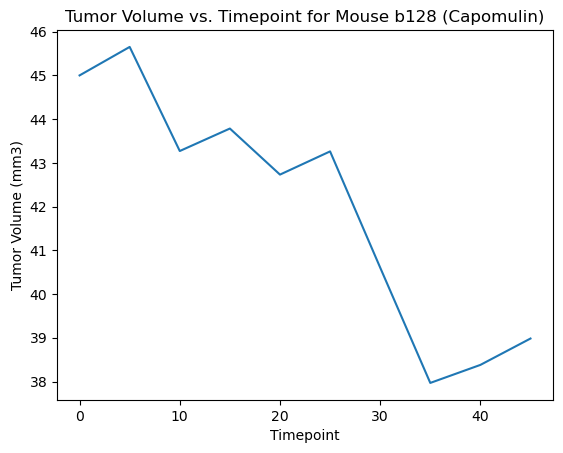

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data = capomulin[capomulin['Mouse ID'] == top_mouse]

#create line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

#add title and labels
plt.title(f"Tumor Volume vs. Timepoint for Mouse {top_mouse} (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

#show plot
plt.show()

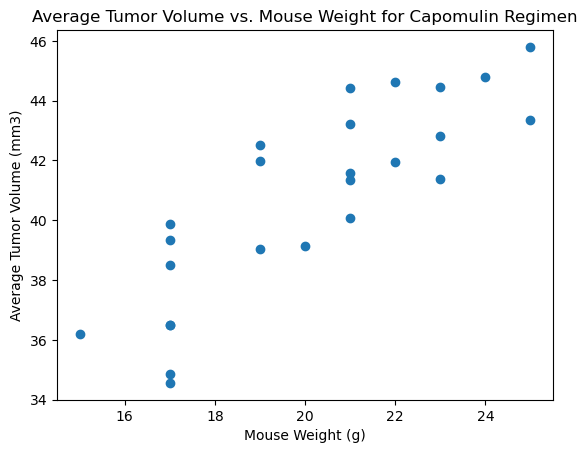

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Group the Capomulin data by mouse ID to calculate the average tumor volume and weight for each mouse
capomulin_grouped = capomulin.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Create a scatter plot with the average tumor volume on the y-axis and the average mouse weight on the x-axis
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

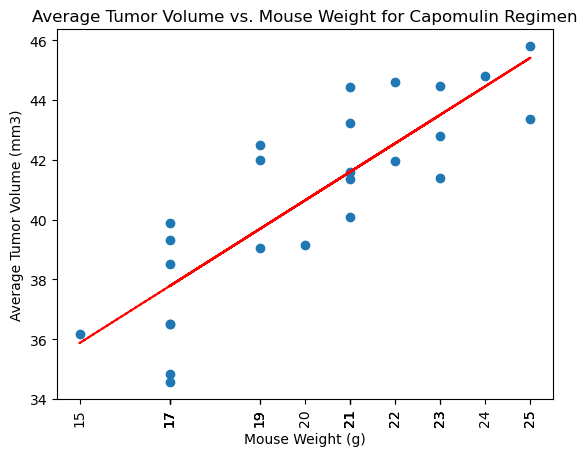

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coef, p_value = st.pearsonr(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

equation = slope * capomulin_grouped['Weight (g)'] + intercept

plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
plt.plot(capomulin_grouped['Weight (g)'],equation, '--', color = 'red')
plt.xticks(capomulin_grouped['Weight (g)'], rotation=90)
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()